# Convolutional Neural Network using TensorFlow framework applied to Fashion-MNIST dataset

The Fashion-MNIST dataset contains 65,000 images of fashion products from 10 different categories. 
- Each image is a 28x28 pixels grayscale size.
- Each category has 7,000 images
- The training set has 60,000 images
- The test set has 10,000 images

Sources: 
- https://github.com/zalandoresearch/fashion-mnist
- https://www.datacamp.com/community/tutorials/cnn-tensorflow-python#tensors

Each training and test example is assigned to one of the following labels:

<ol start="0">
<li>T-shirt/top</li>
<li>Trouser</li>
<li>Pullover</li>
<li>Dress</li>
<li>Coat</li>
<li>Sandal</li>
<li>Shirt</li>
<li>Sneaker</li>
<li>Bag</li>
<li>Ankle boot</li>
</ol>

## Libraries

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
#import input_data
%matplotlib inline
import os

In [3]:
# for training on GPU
os.environ["CUDA_VISIBLE_DEVICES"]="0"

## Load the data

In [4]:
# Import the data
from tensorflow.keras.datasets.fashion_mnist import load_data


(x_train, y_train), (x_test, y_test) = load_data()


# x_train, x_test: uint8 arrays of grayscale image data with shape (num_samples, 28, 28).
# y_train, y_test: uint8 arrays of labels (integers in range 0-9) with shape (num_samples,).

4423680/4422102 [==============================] - 0s 0us/step


## one-hot encoding

In [5]:
# transform the labels categories from 0-9 range to one-hot encoding arrays

#print(type(y_train))
one_hot_y_train = tf.one_hot(indices=y_train, depth=10, on_value=1.0, off_value=0.0)
one_hot_y_test  = tf.one_hot(indices=y_test, depth=10, on_value=1.0, off_value=0.0)

In [6]:
# analyze the data

# shapes of training set
print('training set (images) shape: {shape}'.format(shape=x_train.shape))
print('training set (labels) shape: {shape}'.format(shape=one_hot_y_train.shape))

# shapes of test set
print('test set (images) shape: {shape}'.format(shape=x_test.shape))
print('test set (labels) shape: {shape}'.format(shape=one_hot_y_test.shape))

training set (images) shape: (60000, 28, 28)
training set (labels) shape: (60000, 10)
test set (images) shape: (10000, 28, 28)
test set (labels) shape: (10000, 10)


In [7]:
# visualizing the one-hot encoding

print(y_train[0:10])
print(one_hot_y_train[0:10])

print(y_test[0:10])
print(one_hot_y_test[0:10])

[9 0 0 3 0 2 7 2 5 5]
tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]], shape=(10, 10), dtype=float32)
[9 2 1 1 6 1 4 6 5 7]
tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]], shape=(10, 10), dtype=float32)


## Analyze the dataset

In [8]:
# dictionary of target classes

label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot',    
}

Text(0.5, 1.0, '(Label: Ankle boot)')

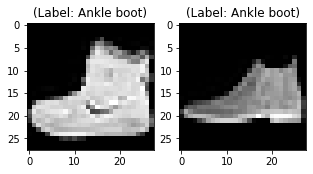

In [9]:
plt.figure(figsize=[5,5])

# display the first image in training dataset
plt.subplot(121)
curr_img = x_train[0]
curr_label = np.argmax(one_hot_y_train[0])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_label]) + ")")

# display the first image in testing dataset
plt.subplot(122)
curr_img = x_test[0]
curr_label = np.argmax(one_hot_y_test[0])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_label]) + ")")

## Data preprocessing

In [10]:
# normalizing the datasets

#type(x_train)
x_train_norm = x_train / np.amax(x_train)
x_test_norm = x_test / np.amax(x_test)

# visualizing the train normalized array
print(np.amin(x_train))
print(np.amin(x_test))
print(np.amax(x_train))
print(np.amax(x_test))

print(x_train_norm[0][20])
print(x_train[0][20])

print(np.amin(x_train_norm))
print(np.amin(x_test_norm))
print(np.amax(x_train_norm))
print(np.amax(x_test_norm))

0
0
255
255
[0.29411765 0.8        0.83137255 0.8        0.75686275 0.80392157
 0.82745098 0.88235294 0.84705882 0.7254902  0.77254902 0.80784314
 0.77647059 0.83529412 0.94117647 0.76470588 0.89019608 0.96078431
 0.9372549  0.8745098  0.85490196 0.83137255 0.81960784 0.87058824
 0.8627451  0.86666667 0.90196078 0.2627451 ]
[ 75 204 212 204 193 205 211 225 216 185 197 206 198 213 240 195 227 245
 239 223 218 212 209 222 220 221 230  67]
0.0
0.0
1.0
1.0


## Deep Neural Network

<table>
<tr>
  <td>INPUT</td>
  <td>28x28 pyxels</td>
 </tr>
</table><br>
<table>
 <tr>
  <th>Nº</th>
  <th>LAYERS</th>
  <th>FILTER</th>
 </tr>
 <tr>
  <td>1st</td>
  <td>convolution</td>
  <td>32 - 3x3</td>
 </tr>
 <tr>
  <td>2nd</td>
  <td>max pooling</td>
  <td>2x2</td>
 </tr>
 <tr>
  <td>3rd</td>
  <td>convolution</td>
  <td>64 - 3x3</td>
 </tr>
 <tr>
  <td>4th</td>
  <td>max pooling</td>
  <td>2x2</td>
 </tr>
 <tr>
  <td>5th</td>
  <td>convolution</td>
  <td>128 3x3</td>
 </tr>
 <tr>
  <td>6th</td>
  <td>max pooling</td>
  <td>2x2</td>
 </tr>
 <tr>
  <td>7th</td>
  <td>FLATEN</td>
  <td></td>
 </tr>
 <tr>
  <td>8th</td>
  <td>DENSE LAYER</td>
  <td>128 units</td>
 </tr>
</table><br>
<table>
<tr>
  <td>OUTPUT</td>
  <td>one-hot encoding</td>
  <td>[0,0,0,0,0,0,0,0,0,1]</td>
 </tr>
</table>

In [11]:
# hyperparameters

#training_iterations: indicate the number of times you train your network
#learning_rate: the learning rate is a factor that is multiplied with the weights based on which the weights get updated. It is a good practice to use a learning rate of 1e-3
#batch_size: The batch size means that your training images will be divided into a fixed batch size, and at every batch, it will take a fixed number of images and train them. It's recommended to use a batch size in the power of 2. Since the number of the physical processor is often a power of 2, using several virtual processors different from a power of 2 leads to poor performance. Also, taking a very large batch size can lead to memory errors, so you have to make sure that the machine you run your code on has sufficient RAM to handle specified batch size.

training_iterations =  10
learning_rate = 0.001
batch_size = 128

In [12]:
# network parameters

# img shape: 28*28
n_inputs = 28

# total classes (0-9 digits)
n_classes = 10

In [13]:
# placeholders

#x = tf.compat.v1.placeholder(dtype=tf.float32)
#y = tf.compat.v1.placeholder(dtype=tf.float32)

In [14]:
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],padding='SAME')

In [20]:
weights = {
    'wc1': tf.Variable('W0', shape=(3,3,1,32),      initial_value=tf.keras.initializers.GlorotNormal()),
    'wc2': tf.Variable('W1', shape=(3,3,32,64),     initial_value=tf.keras.initializers.GlorotNormal()),
    'wc3': tf.Variable('W2', shape=(3,3,64,128),    initial_value=tf.keras.initializers.GlorotNormal()),
    'wd1': tf.Variable('W3', shape=(4*4*128,128),   initial_value=tf.keras.initializers.GlorotNormal()),
    'out': tf.Variable('W6', shape=(128,n_classes), initial_value=tf.keras.initializers.GlorotNormal()),
}
biases = {
    'bc1': tf.Variable('B0', shape=(32),  initial_value=tf.keras.initializers.GlorotNormal()),
    'bc2': tf.Variable('B1', shape=(64),  initial_value=tf.keras.initializers.GlorotNormal()),
    'bc3': tf.Variable('B2', shape=(128), initial_value=tf.keras.initializers.GlorotNormal()),
    'bd1': tf.Variable('B3', shape=(128), initial_value=tf.keras.initializers.GlorotNormal()),
    'out': tf.Variable('B4', shape=(10),  initial_value=tf.keras.initializers.GlorotNormal()),
}

TypeError: ignored